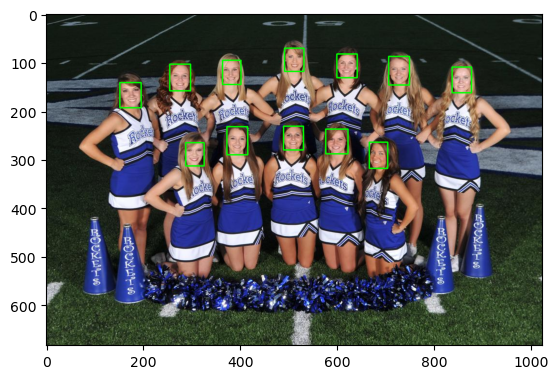

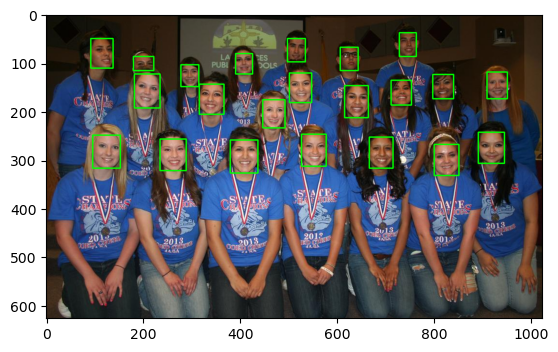

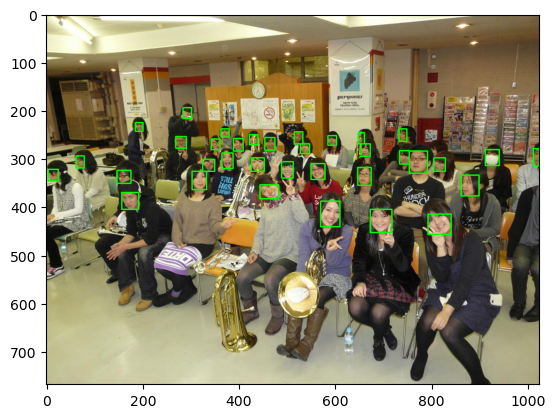

Checking cropped images...
7_Cheering_Cheering_7_74 12


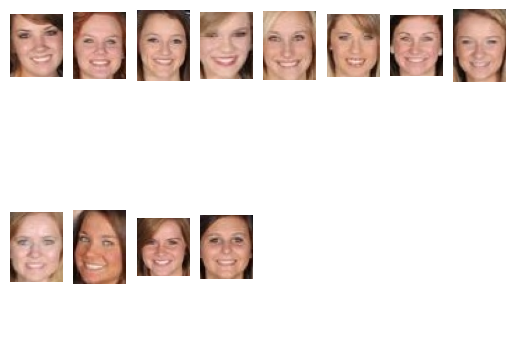

7_Cheering_Cheering_7_543 22


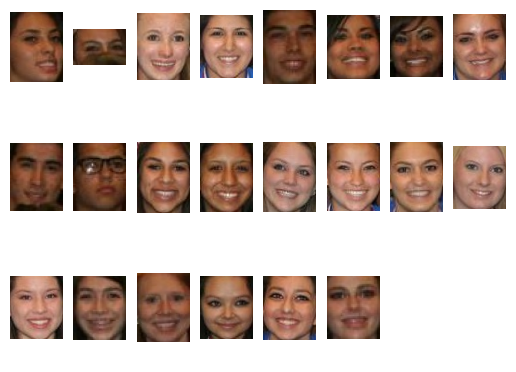

7_Cheering_Cheering_7_889 35


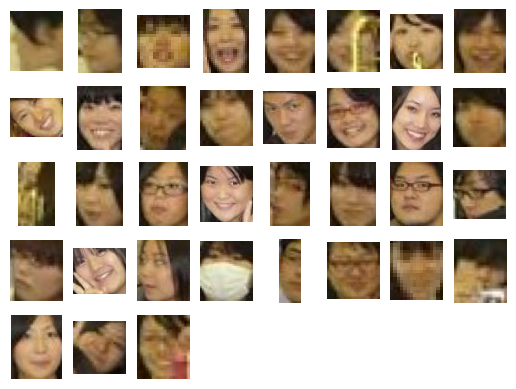

Face Detection using dlib:
Before resize shape: (768, 1024, 3)
7_Cheering_Cheering_7_889.jpg 7


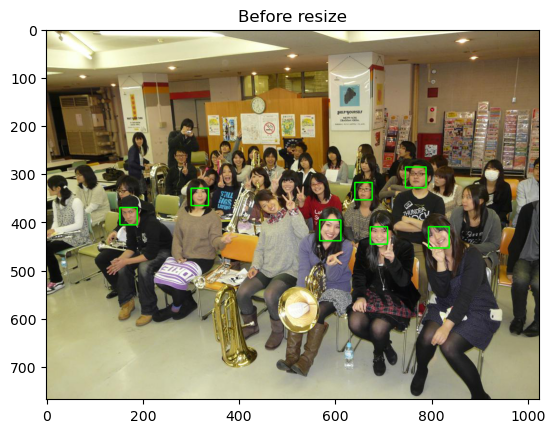

After resize shape: (1400, 1866, 3)
7_Cheering_Cheering_7_889.jpg 14


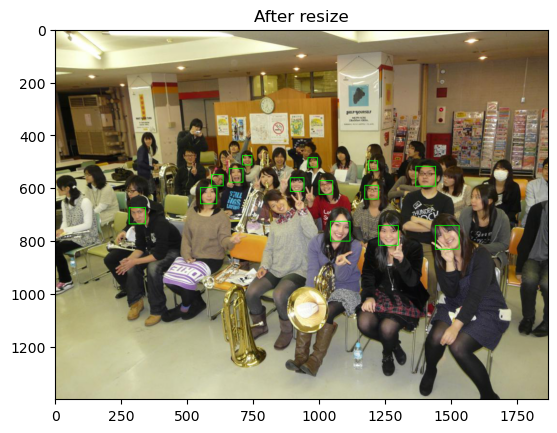

In [1]:
import os, sys
import pickle
import numpy as np
import cv2
import dlib
import matplotlib.pyplot as plt
%matplotlib inline

pkl_path = 'annotation.pkl'
annotate_dict = pickle.load(open(pkl_path,"rb"))
data_dir = 'data_dir'
def draw_bbox():
  # Enter your code here and remove the following pass (20%)
    for img_name in annotate_dict:
        img_path=os.path.join(data_dir,img_name)
        img=cv2.imread(img_path)
        if img is not None:
            for bbox in annotate_dict[img_name]:
                x1,y1,x2,y2=bbox[0],bbox[1],bbox[2],bbox[3]
                cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),thickness=2)
            img=img[:,:,::-1]    
            plt.imshow(img)
            plt.show()
def save_bbox():
    save_dir = 'save_dir' # Do not change this line
  # Enter your code here (20%)    
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)
    for img_name in annotate_dict:
        img_path=os.path.join(data_dir,img_name)
        img=cv2.imread(img_path)
        for j,bbox in enumerate(annotate_dict[img_name]):
            x1,y1,x2,y2=bbox[0],bbox[1],bbox[2],bbox[3]
            img_crop=img[y1:y2,x1:x2]
            name=img_name.strip().split('.')
            save_name=name[0]+"_"+str(j)+".jpg"
            save_path=os.path.join(save_dir,save_name)
            cv2.imwrite(save_path,img_crop)   
    
        
# Do not modify the following two functions. They will be used to check your code.
def display_img_list(img_list):
     col = 8
     row = int(np.ceil(len(img_list)/8))
     k = 0
     fig, ax = plt.subplots(row, col)
     for i in range(row):
       for j in range(col):
         k = j+i*col
         if k < len(img_list):
           ax[i,j].imshow(img_list[k])
         ax[i,j].axis('off')
     plt.show()

def check_bbox():
  save_dir = 'save_dir'
  data_dict = {}
  if not os.path.exists(save_dir):
     print('save_dir is not created!')
     return
  if len(os.listdir(save_dir)) < 10:
     print('cropped faces are not generated!')
     return
  for img_name in annotate_dict:
     img_name = img_name[:-4]
     data_dict[img_name] = []
     for bbox_name in os.listdir(save_dir):
       if img_name in bbox_name:
         bbox_path = os.path.join(save_dir, bbox_name)
         img = cv2.imread(bbox_path)
         data_dict[img_name].append(img[:,:,::-1])
  for img_name in data_dict:
     print(img_name, len(data_dict[img_name]))
     display_img_list(data_dict[img_name])

def test_dlib():
  # Enter your code here and remove the following pass (30%)
    for img_name in annotate_dict:
        if img_name=="7_Cheering_Cheering_7_889.jpg":
            img_path=os.path.join(data_dir,img_name)
            detector=dlib.get_frontal_face_detector()
            img=dlib.load_rgb_image(img_path)
            resize_img=img.copy()
            dets=detector(img,1)
            print("Before resize shape:",img.shape)
            count=0
            for det in dets:
                count+=1
                x1,y1,x2,y2=det.left(),det.top(),det.right(),det.bottom()
                cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),thickness=2)   
            print(img_name,count)
            plt.imshow(img)
            plt.title('Before resize')
            plt.show()
            ratio=1400
            resize_img=cv2.resize(resize_img,(int(ratio*(img.shape[1]/img.shape[0])),ratio))
            print("After resize shape:",resize_img.shape)
            dets=detector(resize_img,1)
            count=0
            for det in dets:
                count+=1
                x1,y1,x2,y2=det.left(),det.top(),det.right(),det.bottom()
                cv2.rectangle(resize_img,(x1,y1),(x2,y2),(0,255,0),thickness=2)   
            print(img_name,count)
            plt.imshow(resize_img)
            plt.title('After resize')
            plt.show()

if __name__ == '__main__':
  # When submitting assignment_2a, please do not modify the following lines  
  draw_bbox()
  save_bbox()
  print('Checking cropped images...')  
  check_bbox()
  print('Face Detection using dlib:')
  test_dlib()